# The goal

- Get familiar with the process
- Be _exposed_ to common problems and techniques
- Learn about bias

# The efficient data scientist

Data science, oversimplified, can be though of as two classes of work, _Algorithms_ and _Analytics_. While analytics may not be doing algorithm design or complex modeling, those who are implementing these algorithms on real data often find themselves analyzing data. They need to understand the biases their models have and confirm that the data is approporiate for the model.

**Ex:** [Google's Waze Navigation Rerouting AI Directed Drivers Through Raging California Wildfires](https://hothardware.com/news/google-waze-navigation-rerouting-ai-directed-drivers-into-california-wildfires)

**Exercise:** In World War II, the US Navy wanted to minimize bomber losses due to enemy fire. Researchers conducted a study on planes that returned from battle. Judging from the sample picture, where should more armour be added to the plane? Note the red dots represent bullet holes.

![](images/survivorship_bias.png)

[Answer](https://en.wikipedia.org/wiki/Survivorship_bias#In_the_military)

# What is the difference?

**Analytics:** Studying the business's data and making recommendations, understanding experiments to improve operations and product. This type of data science is about transforming businesses using insights.

**Algorithms:** Using machine learning and statistics to build tools. Here, the service or model is the product.

Even within the realm of algorithms and machine learning, to make best models, we need to understand the requirements of the data for models to succeed and to confirm these models. For example, take Anscombe's Quartet.

![](images/ascombes_quartet.png)

It turns out that the descriptive statistics (ie. quantiles, correlation, r squared of a linear model) on the data are all the same. This is a common pitfall that occur when we try modeling without... practising safe statistics.

# What we're doing today

There are many problems in machine learning, in this workshop we'll go through a couple but very common ones. 

At the end of the day, we want to predict some kind of value using some labeled data and a model. Labeled data means that whatever response we want to predict, we know the corresponding predictor values that came along with it (ex. # hours studied vs grade on test). These types of problems are known as **supervised learning**.

By model, we are talking about some kind of algorithm that can capture the trends of the data. A very common one you are all probably familar with is a line of best fit, or generally known as **linear regression**.

When we predict data that is _continuous_ (ex. grades, income), are called **regression** problems. If we want to predict some kind of _categorical_ value (ex. Is this a square or a circle?), it becomes a **classification** problem. 

We'll be using a housing prices data set to predict the sale price of a houses located in Ames, Iowa. You can get more information on the dataset on [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

A very powerful tool that we have at our disposal is our notebook (such as this one), we can show code and write our thoughts at the same time to communicate our findings.

> To format the text in a cell, we use Markdown. It's something you can learn 30 minutes and a great asset to have to make your notebooks pretty!

> To learn more about the topics that interest you, Google the topics that are in bold

> Do exercises to enchance your understanding!

# In practice...

It's not very difficult to import a neural network and have it learn from the data.
![](images/naive_code.png)

However when I try to make predictions on the data, I only ranked 3190 / 3437 on the Kaggle leaderboard in terms of the "accuracy" in my predictions.

![](images/naive_submission_ranking.png)

So let's actually start playing around with our data, but first we need to include some of our tools into our workspace.

In [233]:
import os
import pandas as pd # Importing and managing our data
import numpy as np  # Nice linear algebra functions
import matplotlib.pyplot as plt  # For making visualaizations
import seaborn as sns # More visualization tools

# Tell Jupyter Notebook to display our graphs automatically
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

The next thing to do is to import our data into a table called a "data frame".

In [124]:
housing_df = pd.read_csv(os.path.join("data", "train.csv"))

We can see that we have 1460 rows (each observation of data) and 81 columns (usually a variable / predictor).

In [125]:
housing_df.shape

(1460, 81)

We can take a peek at the first 5 observations to see what we're up against using the `head()` method. Notice that all 81 columns don't fit in the ouput.

In [126]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Thus we can just manually output the keys that we're working with. `SalePrice` is the variable that we want to predict using everything else here.

**NOTE:** Not all data will always be labeled so nicely. It is always ideal but I have worked with a dataset where I was not given any labels at all and had to guess them.

**NOTE 2:** `Id` isn't actually something we can use to predict, it's our way of keeping track of our observations. Some datasets have you work with multiple dataframes, and `Id` helps you link them together.

In [183]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Splitting up the data

Wait a minute! Before we start looking at our data, we want to split it up into 3 different sets: a training set, validation set, and a test set. 

Why do we do this? Bias! How do we know if our data accurately represents the entire population? For example, there could be data points where some people decided that they felt generous and sold their houses for very low. When we train our model to fit the data, we don't want it to think such "weird" occurances actually happen so often, this is known as **overfitting**. Notice in the graph below, ideally we want our model to capture the overall trend (black line) in the data, not the minor things (blue line).

![Overfitting](images/overfitting.png)

> All models are wrong, but some are useful - George Box

So what we do is split the dataset into a training set for us to look at and have the model fit its parameters.The validation set is used for tuning **hyperparameters** for our model and seeing how to overall model performs so far. Hyperparameters are setting you can tune yourself to change how to model behaves, in a neural network, how many layers of "neurons" that you have is a hyperparameter. 

![Hyperparameters](images/nn_layers.jpeg)

Once you feel you've made enough adjustments, you can test your model on the test set. **ONLY USE THIS SET ONCE**. If we use it again, we'll be adjusting our model to do really well on this test set but lose our general performance.

Luckily Kaggle provides us with a test set, so we'll split this training data into just the training set and validation set.

We'll be using a function from the library scikit-learn to help split this data accordingly. By default the data is split 75/25 training, validation respectively.

[Read more about how to adjust these splitting settings here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
train_df, validation_df = train_test_split(housing_df, random_state=42)
print("Training dataframe shape:", train_df.shape)
print("Validation dataframe shape:", validation_df.shape)

Training dataframe shape: (1095, 81)
Validation dataframe shape: (365, 81)


Notice the `random_state=42`, this is so that our random split of the data is the same for everyone reading this notebook. That is in general, use this parameter to demonstrate reproducibility.

We can now start exploring our data, this phase is called **Exploratory Data Analysis (EDA)**. This is where we take advantage of our visualization tools and descriptive statistics to find insights.

The goal for EDA on this dataset is to identify the most influential predictors as 79 (exclude `Id` and `SalePrice`) is way too much for this model. This is known as the **Curse of Dimensionality**. We can do some **feature engineering** to cut down and fine tune this dataset.

Let's look at the relationship between features and `SalePrice`, we can do this by looking at the correlations.

In [130]:
train_df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.785016
GrLivArea        0.692972
GarageCars       0.643580
GarageArea       0.621928
TotalBsmtSF      0.593732
1stFlrSF         0.583574
FullBath         0.550914
TotRmsAbvGrd     0.523328
YearBuilt        0.519099
YearRemodAdd     0.512854
GarageYrBlt      0.480037
Fireplaces       0.459994
MasVnrArea       0.459550
BsmtFinSF1       0.359898
WoodDeckSF       0.330551
LotFrontage      0.328260
2ndFlrSF         0.317607
OpenPorchSF      0.288251
HalfBath         0.280946
LotArea          0.265577
BsmtFullBath     0.231760
BsmtUnfSF        0.222568
BedroomAbvGr     0.154896
PoolArea         0.118131
ScreenPorch      0.115839
3SsnPorch        0.054816
MoSold           0.043126
BsmtFinSF2      -0.001716
LowQualFinSF    -0.009295
YrSold          -0.010726
MiscVal         -0.019789
Id              -0.030655
BsmtHalfBath    -0.053061
OverallCond     -0.076693
MSSubClass      -0.089014
EnclosedPorch   -0.144342
KitchenAbvGr    -0.145757
Name: SalePr

## Lot Area vs Sale Price (Outliers)

Looking through the set of features, the column `LotArea` stands out. From intuition, the more land area you have, the more expensive your property is. However there seems to only be a correlation of 0.27. We can use a scatter plot to look at the relationship between the `LotArea` and `SalePrice`.

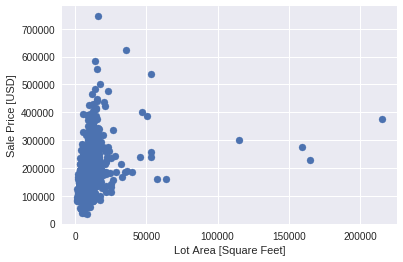

In [131]:
def scatter_lot_vs_sale():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(train_df["LotArea"], train_df["SalePrice"])
    ax.set_xlabel("Lot Area [Square Feet]")
    ax.set_ylabel("Sale Price [USD]")
    plt.show()
scatter_lot_vs_sale()

As expected, as `LotArea` tends to increase, so does `SalePrice`. However, while we kind of have a clear trend going on, we do seem to have quite a bit of outliers.

From Anscombe's Quartet, we saw how outliers could severely affect the fit of a model. The question is, would it be appropiate to remove them from our dataset?

The pandas `describe` method gives you helpful descriptive statistics about some data you want to analyze. In this case, the median house vaue is only 9600 square feet and 75% of the houses have a lot area of less than 11700. 

In [132]:
train_df["LotArea"].describe()

count      1095.000000
mean      10747.046575
std       11065.878057
min        1300.000000
25%        7589.000000
50%        9600.000000
75%       11700.000000
max      215245.000000
Name: LotArea, dtype: float64

We can visualize the same thing above using a boxplot, these charts are useful for visualizing the spread of some data.

[Text(0.5,0,'Lot Area [square feet]')]

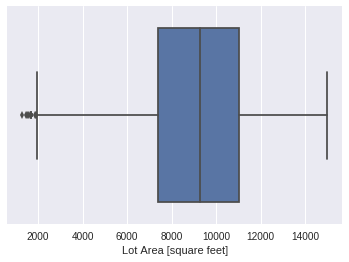

In [153]:
ax = sns.boxplot(train_df["LotArea"])
ax.set(xlabel = "Lot Area [square feet]")

Why are some lots so huge? One can try looking further into it by looking at the relationship of Lot Area to other features, but for the sake of time we'll just drop anything points greater than 15 000 square feet. This is done using the `query` method.

**Exercise:** Use a scatter plot to look at the relationship between `LotArea` and `GrLiveArea` 

In [134]:
train_df = train_df.query("LotArea < 15000")

[Text(0.5,0,'Lot Area [square feet]')]

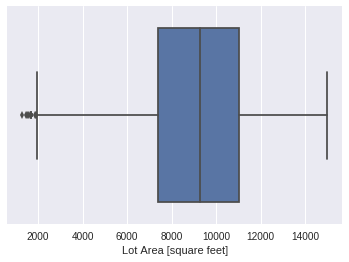

In [135]:
ax = sns.boxplot(train_df["LotArea"])
ax.set(xlabel = "Lot Area [square feet]")

This looks a lot better to manage, now let's look at the scatter plot between `LotArea` and `SalePrice` again.

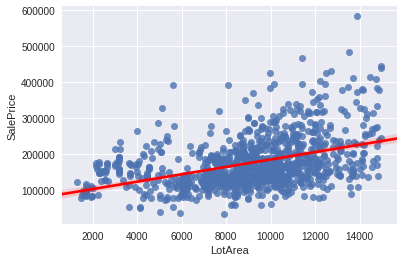

In [142]:
sns.regplot(x=train_df["LotArea"], y=train_df["SalePrice"], line_kws={'color': 'red'})

Another thing to keep note is what kind of relationship we have between two variables. Some relationships you can draw a straight line fairly easily, this one only kind of works. There seems to be more of a quadratic relationship here: the larger the lot area, the faster the sale price rises.

Let's keep this is in mind when we're training our model.

Now we can use our tools to look at the relationship between other variables. Let's try seeing if the year the house was sold has has any relationship.

[Text(0,0.5,'Sale Price (USD)'), Text(0.5,0,'Year Sold')]

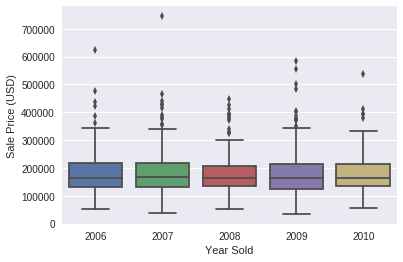

In [60]:
ax = sns.boxplot(data=train_df.pivot(columns="YrSold", values="SalePrice"))
ax.set(xlabel="Year Sold", ylabel="Sale Price (USD)")

The year the house was sold doesn't seem to have much of an effect, so let's not include it in our model.

In [199]:
train_df = train_df.drop(["YrSold"], axis=1)

## What's with all this square feet? (Correlated Variables)

When fitting our model, we need to check if our features are correlated with each other. As an analogy, say in American football, if someone _Person A_ gets tackled by _Person B_, it's obvious that Person B was the cause. But if _Person A_ gets tackled by _Person B, C,_ and _D_, it's a lot less clear on who did contributed most to the tackle.

This is known as **multicollinearity**.

For our purposes, this will be useful in cutting down our feature set.

For example let's look at `GrLivArea` (Above grade (ground) living area square feet), `1stFlrSF` (First Floor square feet), and `2stFlrSF`. It's rather obvious that these combinations are very correlated so we can just drop them.

[Text(0,0.5,'1st Floor + 2nd Floor Square Footage'),
 Text(0.5,0,'Total Square Footage')]

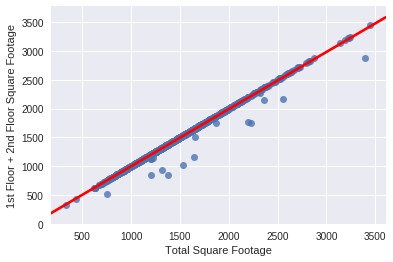

In [160]:
ax = sns.regplot(x=train_df["GrLivArea"], 
                 y=(train_df["1stFlrSF"] + train_df["2ndFlrSF"]),
                 line_kws={'color': 'red'})
ax.set(xlabel="Total Square Footage", ylabel="1st Floor + 2nd Floor Square Footage")

In [176]:
train_df = train_df.drop(["1stFlrSF", "2ndFlrSF"], axis=1)

# Where are all my pools? (Missing Data)

It seems like whether or not a house has a pool will affect the value of a house, let's take a look at `PoolArea` and `PoolQC` (Pool Quality). 

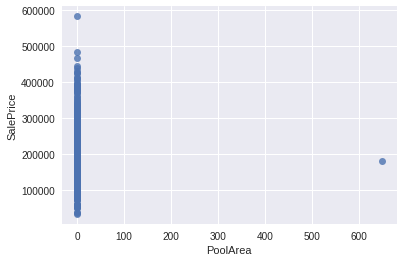

In [189]:
sns.regplot(x=train_df["PoolArea"], y=train_df["SalePrice"], fit_reg=False)

Hey... what?

Let's take a closer look.

In [191]:
train_df[["PoolArea", "PoolQC"]].head()

,PoolArea,PoolQC
1023,0,NaN
810,648,Fa
1384,0,NaN
626,0,NaN
813,0,NaN


The **NaN** in the data means that nothing is recorded. Don't mistaken this for zero, if you have a variable like `Age`, it means it wasn't filled out, not that they're 0 years old. So should we just remove these variables?

In [193]:
print("% missing =", train_df["PoolQC"].isnull().sum() / len(train_df))

% missing = 0.999000999001


There are many techniques into handling missing data, the question you need to ask is **why is it missing**?

In this case we only have 1 data point that tells us anything about the pool, so we'll just take it out.

In [195]:
train_df = train_df.drop(["PoolArea", "PoolQC"], axis=1)

# Making a prediction

Now this process is iterative, going through each feature until we're happy. However if I went through all 79 features, we'd be here for a while. So We'll only use a subset of our features to predict our house score.

> More fireplaces means a higher value!

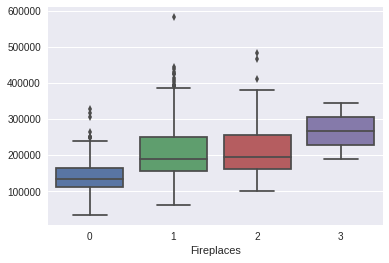

In [180]:
sns.boxplot(data=train_df.pivot(columns="Fireplaces", values="SalePrice"))

The features we will use are:

In [230]:
predictors = ["LotArea", "GrLivArea", "OverallQual", "Fireplaces"]

In [212]:
from sklearn.linear_model import Ridge   # Our model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Remember when looking at `LotSize`, it wasn't exactly a linear relationship. Luckily we'll be able to take that into account using polynomial features! The idea is to transform our data such that our model can capture these non-linear features. Scikit-learn gives us the ability to transform with just a couple lines of code.

In [214]:
poly = PolynomialFeatures()

In [235]:
final_df = poly.fit_transform(train_df[predictors])

In [236]:
model = Ridge()
model.fit(final_df, y=train_df["SalePrice"])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Now we can do some predictions with our validation set!

In [237]:
predictions = model.predict(poly.fit_transform(validation_df[predictors]))

The mean squared error essentially tells us how wrong we are with bad predictions being peanlized even more.

![](images/mse.gif)

In [211]:
mean_squared_error(validation_df["SalePrice"], predictions)

1775764298.7739043

If you aren't happy with it, you can keep trying to fine tune your model, but remember the more stuff you change, the more likely you are to overfit to that dataset.

For this workshop, let's go straight to predicting our test set on Kaggle.

In [221]:
test_df = pd.read_csv(os.path.join("data", "test.csv"))

predictions = model.predict(poly.fit_transform(test_df[["LotArea", "GrLivArea", "OverallQual", "Fireplaces"]]))

submission = pd.DataFrame({"Id": test_df["Id"], "SalePrice": predictions})

submission.to_csv("linreg_submission.csv", index=False)

![](images/new_submission.png)

Wow even with only a linear model and a few predictors, we did better than our neural network!